# 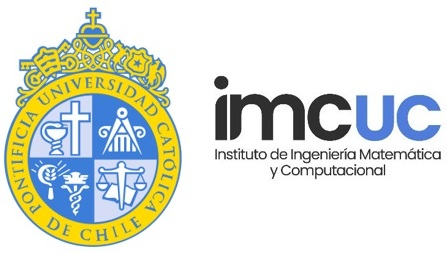  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 12: Aprendizaje no supervisado</center></h1>

Esta actividad busca que apliquen algunas de las herramientas de aprendizaje no supervisado que hemos visto.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 07". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. 
    
**La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Nuevamente, para esta actividad usaremos los mismos datos que usaron en la Interrogación 2, en una base simplificada llamada `oceanData.csv`, que está an la misma carpeta de GitHub que el Notebook de esta actividad. Este archivo CSV resulta de limpir y luego unir las bases `Bottle` y `Cast` como le tocó hacer en la I2.

## Rúbrica

- Si han logrado el punto 1: 3.0
- Si han logrado hasta el punto 2.2: 4.0
- Si han logrado hasta el punto 2.4: 5.0
- Si han logrado todo: 7.0

In [1]:
# librerías necesarias para el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos

### 1.1 Lectura y preparación
El siguiente código abre el archivo `oceanData.csv`, dejando la información en un DataFrame llamado `oceanData` y luego agrega una columna llamada `decada` que suma la década de cada muestra.

Corra la celda para tener el archivo cargado y listo para su trabajo posterior.

In [2]:
# lectura de datos
oceanData = pd.read_csv('oceanData.csv')
# agregar década
oceanData['decada'] = np.floor(oceanData['Year']/10)*10
# mostrar parte del DataFrame
oceanData.head()

,Unnamed: 0,Date,Year,Month,Depthm,T_degC,Salnty,STheta,decada
0,0,3/1/1949,1949,3,0,10.50,33.440,25.649,1940.0
1,1,3/1/1949,1949,3,8,10.46,33.440,25.656,1940.0
2,2,3/1/1949,1949,3,10,10.46,33.437,25.654,1940.0
3,3,3/1/1949,1949,3,19,10.45,33.420,25.643,1940.0
4,4,3/1/1949,1949,3,20,10.45,33.421,25.643,1940.0


### 1.2 Visualización
El siguiente código nos permite visualizar la distribución de valores de cada una de las columnas que nos van a interesar en este trabajo. Corra la siguiente celda para ver los histogramas.

<Axes: xlabel='decada', ylabel='Count'>

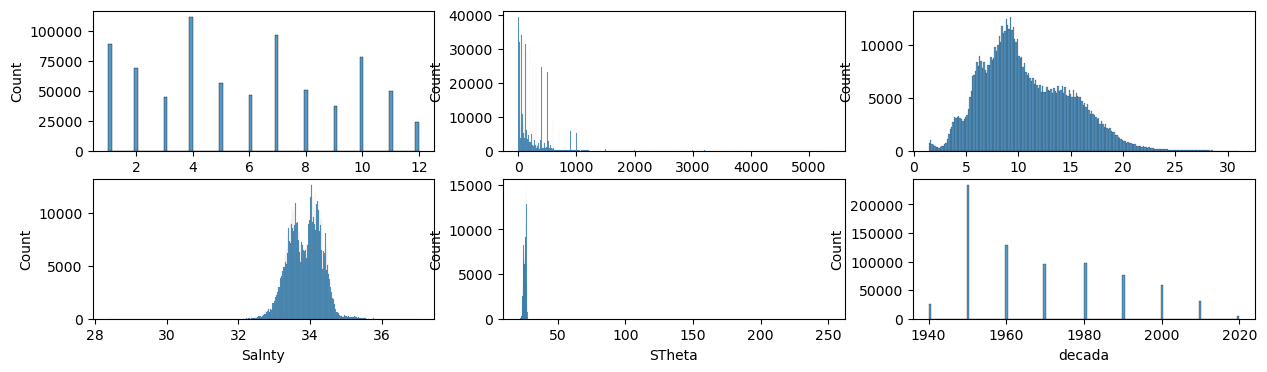

In [3]:
fig,axes = plt.subplots(2, 3, figsize=(15,4))

sns.histplot(data=oceanData, x='Month', ax=axes[0, 0])
sns.histplot(data=oceanData, x='Depthm', ax=axes[0, 1])
sns.histplot(data=oceanData, x='T_degC', ax=axes[0, 2])
sns.histplot(data=oceanData, x='Salnty', ax=axes[1, 0])
sns.histplot(data=oceanData, x='STheta', ax=axes[1, 1])
sns.histplot(data=oceanData, x='decada', ax=axes[1, 2])

## 2. Agrupaciones

En este ejercicio queremos ver si las muestras pueden ser clasificadas en algunos grupos generales que se diferencian entre sí. Para ello usaremos herramientas de aprendizaje no supervisado, en particular, clustering.

### 2.1 Escalamiento
El primer paso es escalar los datos. Para ello corra la siguiente celda que escala cada una de las columnas que usaremos. Posteriormente haga un histograma de cada columna para ver cómo quedaron los datos.

Luego repita los histogramas anteriores pero con los datos escalados para visualizar el efecto del escalamiento.

In [4]:
# libreria necesaria
from sklearn.preprocessing import StandardScaler

# escalamiento
scaler=StandardScaler()
oceanData_sc=scaler.fit_transform(oceanData[['Month', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'decada']])
oceanData_sc

array([[-0.86313334, -0.74092351, -0.06288519, -0.91472405, -0.16853204,
        -1.47866522],
       [-0.86313334, -0.71476789, -0.07234434, -0.91472405, -0.16257259,
        -1.47866522],
       [-0.86313334, -0.70822898, -0.07234434, -0.92126586, -0.16427529,
        -1.47866522],
       ...,
       [ 1.25839152, -0.72457625,  2.37851997, -0.50804194, -1.99990485,
         2.6464551 ],
       [ 1.25839152, -0.70822898,  1.7889788 , -0.75488599, -1.52612863,
         2.6464551 ],
       [ 1.25839152, -0.70495953,  1.604289  , -0.79195621, -1.37527795,
         2.6464551 ]])

<Axes: ylabel='Count'>

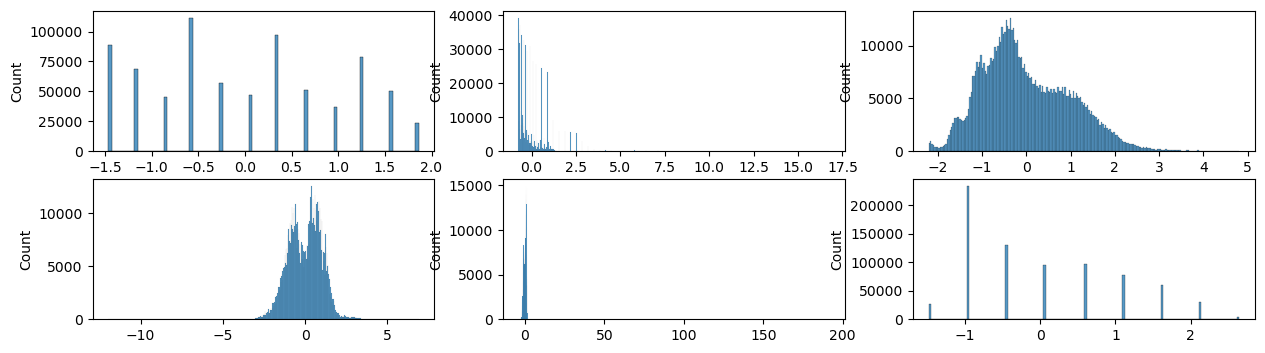

In [5]:
# agregar gráficos de distribución
fig,axes = plt.subplots(2, 3, figsize=(15,4))

sns.histplot(data=oceanData_sc[:,0], ax=axes[0, 0])
sns.histplot(data=oceanData_sc[:,1], ax=axes[0, 1])
sns.histplot(data=oceanData_sc[:,2], ax=axes[0, 2])
sns.histplot(data=oceanData_sc[:,3], ax=axes[1, 0])
sns.histplot(data=oceanData_sc[:,4], ax=axes[1, 1])
sns.histplot(data=oceanData_sc[:,5], ax=axes[1, 2])

### 2.2 Clustering
En la siguiente celda use el algoritmo k-means para armar 3 clusters con los datos escalados. En la celda ya está parte del código que necesitan para ello.

Almacene su modelo en una variable llamada `clusters`.

In [6]:
from sklearn.cluster import KMeans

#número predefinido de clusters
nclusters = 3

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=nclusters, n_init='auto')
# Fijar semilla para reproducibilidad
np.random.seed(1234)
# Correr el algoritmo sobre el conjunto de variable normalizadas
clusters = kmeans.fit(oceanData_sc)

La siguiente celda agrega una etiqueta a cada punto según el cluster asignado. Corra la celda para tener esa etiqueta en sus datos originales.

In [7]:
# agregar etiquetas
labels = kmeans.predict(oceanData_sc)
oceanData['cluster_labels'] = labels
oceanData.sample(10)

,Unnamed: 0,Date,Year,Month,Depthm,T_degC,Salnty,STheta,decada,cluster_labels
565152,565152,8/20/1988,1988,8,1,15.560,33.6520,24.81100,1980.0,2
620186,620186,1/8/1995,1995,1,113,14.310,33.6480,25.08200,1990.0,2
700046,700046,4/17/2005,2005,4,229,8.400,34.0870,26.50100,2000.0,1
334734,334734,7/14/1964,1964,7,169,8.920,34.1160,26.44200,1960.0,1
754437,754437,10/17/2020,2020,10,5,19.966,33.6203,23.72028,2020.0,2
589177,589177,11/12/1990,1990,11,51,13.210,33.1550,24.92400,1990.0,2
35298,35298,3/15/1950,1950,3,300,7.670,34.2160,26.71100,1950.0,1
273838,273838,4/14/1960,1960,4,103,9.800,33.3800,25.72300,1960.0,0
59620,59620,10/17/1950,1950,10,250,7.040,34.0870,26.69800,1950.0,1
635480,635480,2/6/1997,1997,2,400,6.110,34.1150,26.84400,1990.0,1


### 2.3 Evaluación
Indique el valor de la métrica de inercia de su modelo

In [8]:
clusters.inertia_

2714671.4636392375

### 2.4 Visualización
Haga un único scater plot de temperatura vs salinidad, dejando de un color diferente cada muestra según el cluster al que fue asignado.

<Axes: xlabel='T_degC', ylabel='Salnty'>

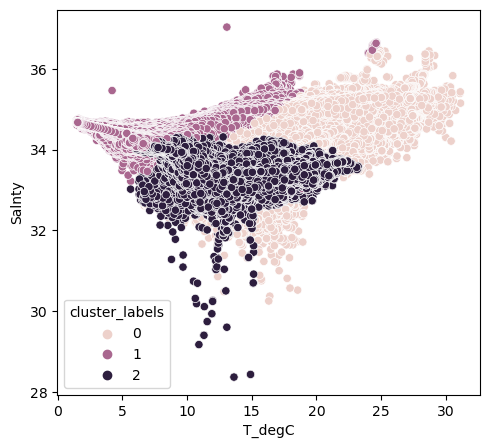

In [9]:
fig = plt.figure(figsize=(12,5))

# temperatura vs salinidad
ax = fig.add_subplot(121)
sns.scatterplot(data=oceanData, x='T_degC', y='Salnty', hue='cluster_labels', ax=ax)

## 3. Seleccionando `n`

Repita el ejercicio de clustering anterior para valores de `n` desde 1 hasta 20. Haga un gráfico con el valor de la inercia de su modelo para cada valor de `n`. ¿Cuál `n` eligiría para la agrupación de muestras?

In [10]:
inertia = []
kmax = 20

# entrenamiento y evaluación
for i in range(1,kmax):
    # modelo
    kmeans = KMeans(n_clusters=i, n_init='auto')
    nCluster = kmeans.fit(oceanData_sc)

    print(i, nCluster.inertia_)
    inertia.append(nCluster.inertia_)

1 4530461.999999995
2 3047748.1725784345
3 2655856.7532072645
4 2347307.8991476945
5 2187139.3398157
6 1900827.2859169585
7 1744583.7455724333
8 1510152.9765800487
9 1376484.788582619
10 1290452.5527078882
11 1155897.7360494179
12 1071391.8783224663
13 1002426.6194103459
14 960655.0886919391
15 911504.6151979101
16 880439.5020237676
17 846885.8179306302
18 816093.2566116954
19 799206.9170948102


Text(0.5, 1.0, 'K-means - Método del codo')

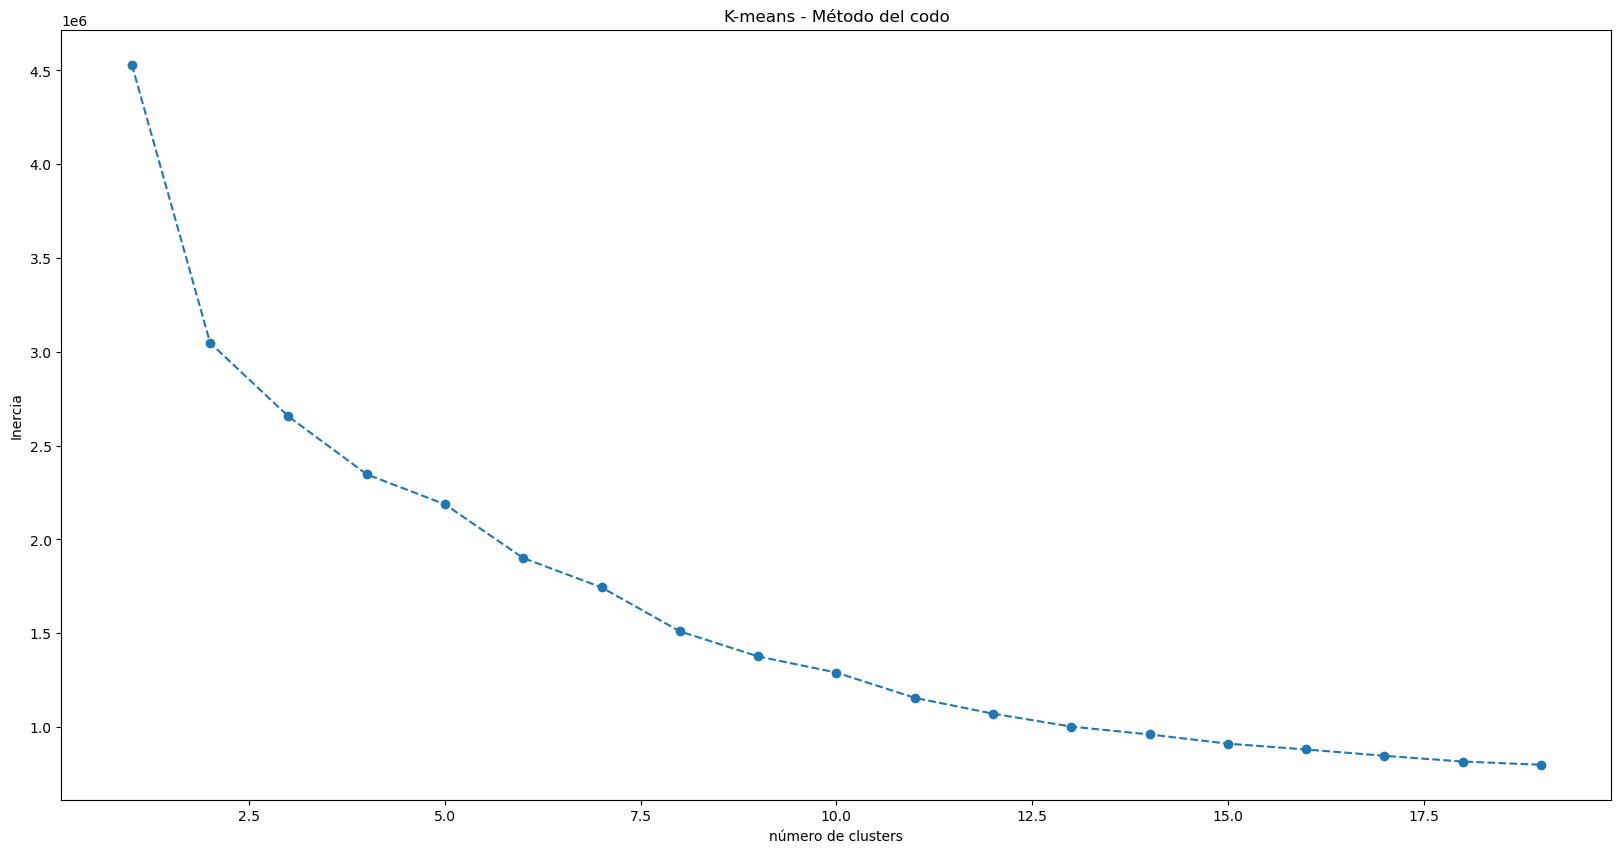

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax), inertia, marker='o', ls='--')
ax.set_xlabel('número de clusters')
ax.set_ylabel('Inercia')
ax.set_title('K-means - Método del codo')

## Última parte: apoyo a la licenciatura

Ahora que ha terminado la Actividad, les agradeceríamos visitar https://cursos.canvas.uc.cl/courses/63834 y contestar la encuesta docente. Es una herramienta muy útil para nosotros pues nos permite fortalecer el programa de Licenciatura y apoyar el desarrollo de los Científicos/as de Datos que egresarán del IMC.

Muchas gracias.